<h1> Deep Learning Small Project </h1>

In [1]:
%matplotlib inline

# Display
from IPython.display import Image

# Torch
import torch
from torch.utils.data import DataLoader
from torch import optim, nn

# Custom
import data
import model
import utils

Using Custom Dataloader, Data Split for First Layer classification task (normal vs infected)

In [2]:
fl_labels = {
0 : "Normal",
1 : "Infected"
}

fl_train = data.Lung_Dataset('train', verbose = 0)
fl_test = data.Lung_Dataset('val', verbose = 0)
fl_val = data.Lung_Dataset('test', verbose = 0)

"""
Data Split for Second Layer classification task (COVID vs Non-COVID) 
"""

sl_labels = {
0 : "COVID",
1 : "Non-COVID"
}

sl_train = data.Lung_Dataset('train', verbose = 2)
sl_test = data.Lung_Dataset('val', verbose = 2)
sl_val = data.Lung_Dataset('test', verbose = 2)

"""
Data Split for combined classification task (normal vs COVID vs Non-COVID) 
"""

combined_labels = {
0 : "Normal",
1 : "COVID",
2 : "Non-COVID"
}

final_val = data.Lung_Dataset('test', verbose = 1)
final_test = data.Lung_Dataset('val', verbose = 1)

Defining Model Parameters

In [3]:
N_EPOCH = 200
L_RATE = 0.001
BATCH_SIZE = 16
PATIENCE = 5
DROPOUT = 0.1
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Training the First Layer Model

Training the first model to classify normal and infected images


Epoch 1



Validation loss: 0.7863664672924922
Validation set accuracy:  72.84552845528455 %


Epoch 2



Validation loss: 0.9713232915561932
Validation set accuracy:  69.59349593495935 %


Epoch 3



Validation loss: 0.7362616574152921
Validation set accuracy:  75.1219512195122 %


Epoch 4



Validation loss: 1.2469473786843128
Validation set accuracy:  69.10569105691057 %


Epoch 5



Validation loss: 0.6254715823974365
Validation set accuracy:  79.1869918699187 %


Epoch 6



Validation loss: 0.7092058377770277
Validation set accuracy:  78.21138211382114 %


Epoch 7



Validation loss: 0.4126552219908589
Validation set accuracy:  85.20325203252033 %


Epoch 8



Validation loss: 1.0460524310668309
Validation set accuracy:  73.98373983739837 %


Epoch 9



Validation loss: 1.9057808816432953
Validation set accuracy:  68.45528455284553 %


Epoch 10



Validation loss: 0.674146175957643
Validation set accuracy:  82.4390243902439 %


Epoch 11



Validation loss: 1.409649490736998
Validation set accuracy:  71.869918699187 %


Epoch 12



Validation loss: 1.7812872192798517
Validation set accuracy:  70.40650406504065 %



Test Accuracy of the first model:
Test set accuracy:  96.0 %


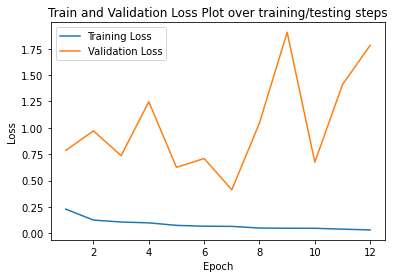

In [4]:
#First Model Training
fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE, shuffle=True)
fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE, shuffle=True)
fl_test_loader = DataLoader(fl_test, batch_size=BATCH_SIZE, shuffle=True)
    
fl_model = model.CNN(dropout=DROPOUT).to(device)
fl_optimizer = optim.AdamW(fl_model.parameters(), lr=L_RATE)
    
print("Training the first model to classify normal and infected images")
model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")

print("\n\n")
print("Test Accuracy of the first model:")
model.test(fl_model, device, fl_test_loader)

fl_model.to("cpu")
    
model.save_model(fl_model, fl_optimizer, './saved_models/fl_model.pth')

Training the Second Layer Model




Training the second model to classify COVID and non-COVID images


Epoch 1



Validation loss: 0.43343520412842435
Validation set accuracy:  83.98950131233596 %


Epoch 2



Validation loss: 0.4352663494646549
Validation set accuracy:  78.47769028871392 %


Epoch 3



Validation loss: 0.37873240870734054
Validation set accuracy:  88.18897637795276 %


Epoch 4



Validation loss: 0.3776499250282844
Validation set accuracy:  85.30183727034121 %


Epoch 5



Validation loss: 0.42942151551445323
Validation set accuracy:  79.26509186351706 %


Epoch 6



Validation loss: 0.33183650610347587
Validation set accuracy:  89.23884514435696 %


Epoch 7



Validation loss: 0.2945013555387656
Validation set accuracy:  90.55118110236221 %


Epoch 8



Validation loss: 0.36635176837444305
Validation set accuracy:  82.1522309711286 %


Epoch 9



Validation loss: 0.3549978689601024
Validation set accuracy:  86.08923884514435 %


Epoch 10



Validation loss: 0.3491907510906458
Validation set accuracy:  88.4514435695538 %


Epoch 11



Validation loss: 0.4180263044933478
Validation set accuracy:  78.47769028871392 %


Epoch 12



Validation loss: 0.28181699849665165
Validation set accuracy:  90.28871391076116 %


Epoch 13



Validation loss: 0.3330194695542256
Validation set accuracy:  86.08923884514435 %


Epoch 14



Validation loss: 0.3882056636114915
Validation set accuracy:  82.1522309711286 %


Epoch 15



Validation loss: 0.4541130581249793
Validation set accuracy:  80.5774278215223 %


Epoch 16



Validation loss: 0.4132151131828626
Validation set accuracy:  81.62729658792651 %


Epoch 17



Validation loss: 0.457420473297437
Validation set accuracy:  79.5275590551181 %



Test Accuracy of the second model:
Test set accuracy:  64.70588235294117 %


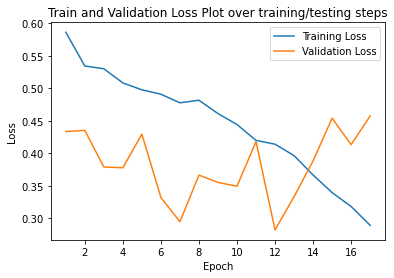

In [5]:
#Second Model Training
sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE, shuffle=True)
sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE, shuffle=True)
sl_test_loader = DataLoader(sl_test, batch_size=BATCH_SIZE, shuffle=True)
    
sl_model = model.CNN(dropout=DROPOUT).to(device)  
sl_optimizer = optim.Adam(sl_model.parameters(), lr=L_RATE)
    
print("\n\n")
print("Training the second model to classify COVID and non-COVID images")
model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
    
print("\n\n")
print("Test Accuracy of the second model:")
model.test(sl_model, device, sl_test_loader)
    
sl_model.to("cpu")
    
model.save_model(sl_model, sl_optimizer, './saved_models/sl_model.pth')

Analyzing the performance of each model (first layer and second layer models) 

Learning Curve of the First Layer Model

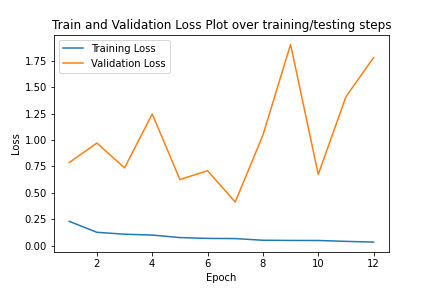

In [12]:
Image(filename='./saved_graphs/fl_learning_curve.png') 

Learning Curve of the Second Layer Model

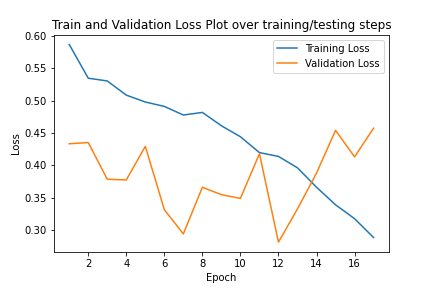

In [13]:
Image(filename='./saved_graphs/sl_learning_curve.png') 

Combine the 2 Models and Test the results on validation and test

Validation Results
Accuracy: 0.7983739376068115
Precision: [0.949685534591195, 0.6341463414634146, 0.8082191780821918]
Recall: [0.6452991452991453, 0.7482014388489209, 0.9752066115702479]

Test Results
Accuracy: 0.7199999690055847
Precision: [0.8888888888888888, 0.6666666666666666, 0.5714285714285714]
Recall: [1.0, 0.6666666666666666, 0.5]



Visualizing the Test Set: 


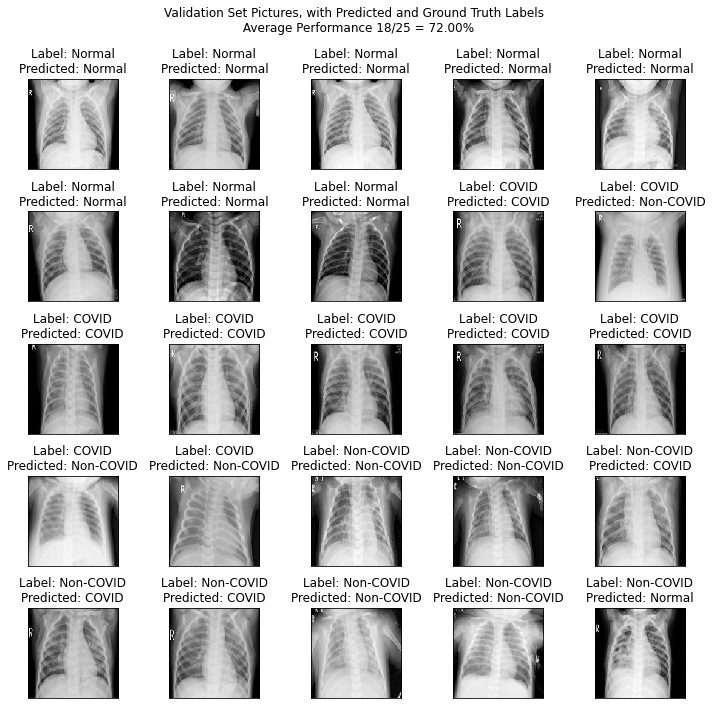

In [17]:
final_val_loader = DataLoader(final_val, batch_size=BATCH_SIZE, shuffle=False)
final_test_loader = DataLoader(final_test, batch_size=BATCH_SIZE, shuffle=False)
    
combined_model = model.load_combined('./saved_models/fl_model.pth','./saved_models/sl_model.pth',optim.AdamW ,L_RATE, DROPOUT)
pred = combined_model.predict_loader(device, final_val_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_val_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)
print("Validation Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))
print()
pred = combined_model.predict_loader(device, final_test_loader)
actual = torch.empty(0, 3).to(device)
for _, labels in final_test_loader:
    labels = labels.to(device)
    actual = torch.cat((actual, labels), 0)

print("Test Results")
print("Accuracy: {}".format(model.accuracy(pred, actual)))
print("Precision: {}".format(model.precision(pred, actual)))
print("Recall: {}".format(model.recall(pred, actual)))

print("\n\n")
print("Visualizing the Test Set: ")
utils.generate_performance_display(final_test_loader, pred, combined_labels)